Bardzo luźne oraz bardzo wstępne EDA ukazujące z czym mamy do czynienia jeżeli chodzi o dane.
Zestaw pochodzi ze strony https://zenodo.org/records/12665499

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

RoboticArm zawiera więcej danych, więc to na tej maszynie skupimy się w naszym projekcie. Zarówno dane treningowe i testowe podzielone są na source i target, pozwolę sobie w tym miejscu na przeklejenie informacji podanej na stronie:

"Combinations of operating and environmental conditions divide each machine's dataset into two subsets: the source domain and the target domain. The source domain has a large number of training examples. The target domain, instead, has limited training data. This discrepancy highlights a common issue in the industry where sufficient training data is often unavailable for the target domain, as machine data is collected under controlled environments that do not fully represent the deployment environments."

In [9]:
DATA_DIR = "C:\\Users\\HARDPC\\PycharmProjects\\random\\RoboticArm"
TRAIN_DIR = os.path.join(DATA_DIR, "train")
TEST_DIR = os.path.join(DATA_DIR, "test")

train_files = {
    "normal_source": "attributes_normal_source_train.csv",
    "normal_target": "attributes_normal_target_train.csv",
}

test_files = {
    "anomaly_source": "attributes_anomaly_source_test.csv",
    "anomaly_target": "attributes_anomaly_target_test.csv",
    "normal_source": "attributes_normal_source_test.csv",
    "normal_target": "attributes_normal_target_test.csv",
}

In [21]:
def load(file_dict, base_dir):
    datasets = {}
    for dataset_name, filename in file_dict.items():
        file_path = os.path.join(base_dir, filename)
        if os.path.exists(file_path):
            datasets[dataset_name] = pd.read_csv(file_path)
        else:
            print(f"File {filename} not found in {base_dir}")
    return datasets

In [25]:
train = load(train_files, TRAIN_DIR)
test = load(test_files, TEST_DIR)

In [28]:
def sensor_counts(dataframes_dict, dataset_type):
    summary = []
    for name, df in dataframes_dict.items():
        summary.append({
            "dataset": f"{dataset_type}_{name}",
            "acc_files": df["ism330dhcx_acc"].nunique(),
            "gyro_files": df["ism330dhcx_gyro"].nunique(),
            "mic_files": df["imp23absu_mic"].nunique()
        })
    return pd.DataFrame(summary)

In [29]:
train_summary = sensor_counts(train, "train")
test_summary = sensor_counts(test, "test")

display(train_summary)
display(test_summary)

,dataset,acc_files,gyro_files,mic_files
0,train_normal_source,1812,1812,1812
1,train_normal_target,27,27,27


,dataset,acc_files,gyro_files,mic_files
0,test_anomaly_source,116,116,116
1,test_anomaly_target,116,116,116
2,test_normal_source,116,116,116
3,test_normal_target,116,116,116


Czyli do treningu mamy 1812 nagrań na każde urządzenie. Klasa anomalia/brak anomalii nakładana jest na pojedyncze nagranie

In [30]:
def plot_acc_gyro(file_path, title, n_samples=2000):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return

    df = pd.read_parquet(file_path)
    time_col = next((c for c in df.columns if "time" in c.lower()), df.columns[0])
    axes_cols = [c for c in df.columns if any(ax in c.lower() for ax in ["x", "y", "z"])]

    plt.figure(figsize=(10, 4))
    for col in axes_cols:
        plt.plot(df[time_col].iloc[:n_samples], df[col].iloc[:n_samples], label=col)
    plt.xlabel("Time [s]")
    plt.ylabel("Value")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [31]:
def plot_microphone(file_path, title, n_samples=2000):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return

    df = pd.read_parquet(file_path)
    time_col = next((c for c in df.columns if "time" in c.lower()), df.columns[0])
    value_col = next((c for c in df.columns if c != time_col), None)


    plt.figure(figsize=(10, 4))
    plt.plot(df[time_col].iloc[:n_samples], df[value_col].iloc[:n_samples], color="orange")
    plt.xlabel("Time [s]")
    plt.ylabel("Value")
    plt.title(title)
    plt.grid(True)
    plt.show()

Dane normalne

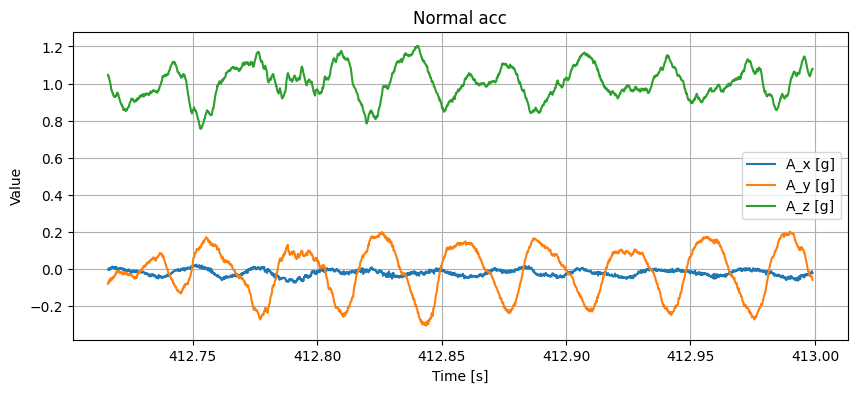

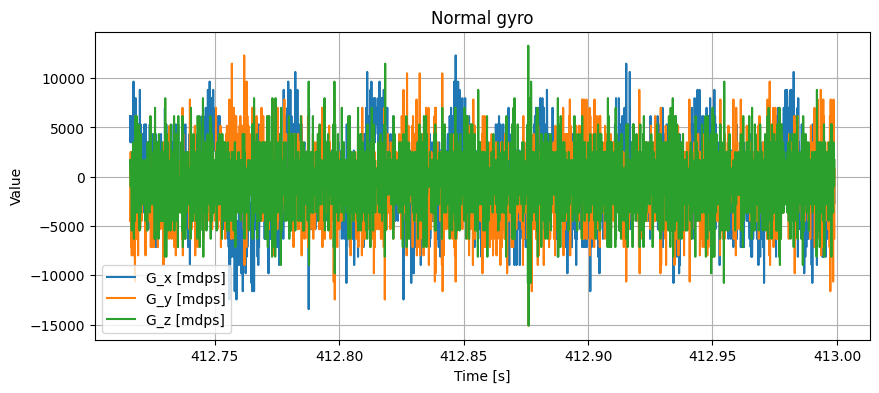

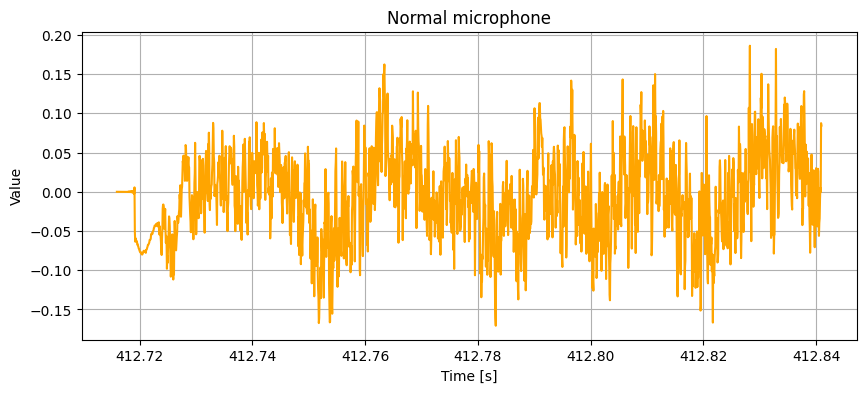

In [33]:
acc_file = os.path.join(TRAIN_DIR, "ism330dhcx_acc_20240222_14_02_57_dataLog_41.parquet")
gyro_file = os.path.join(TRAIN_DIR, "ism330dhcx_gyro_20240222_14_02_57_dataLog_41.parquet")
mic_file = os.path.join(TRAIN_DIR, "imp23absu_mic_20240222_14_02_57_dataLog_41.parquet")

plot_acc_gyro(acc_file, "Normal acc")
plot_acc_gyro(gyro_file, "Normal gyro")
plot_microphone(mic_file, "Normal microphone")


Dane oznaczone jako anomalia

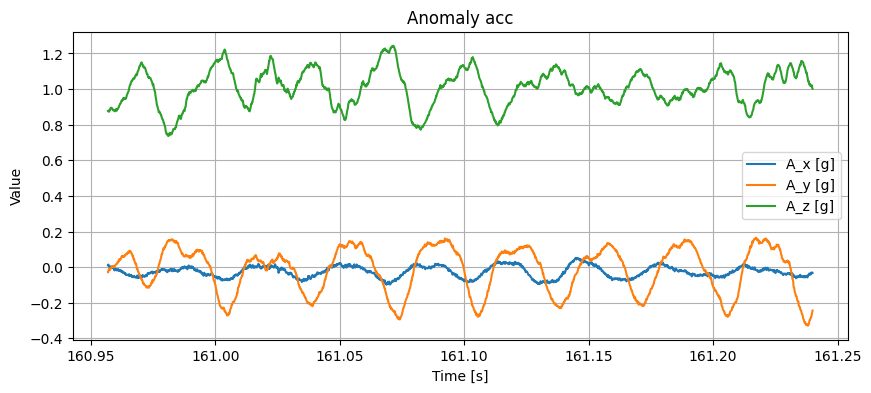

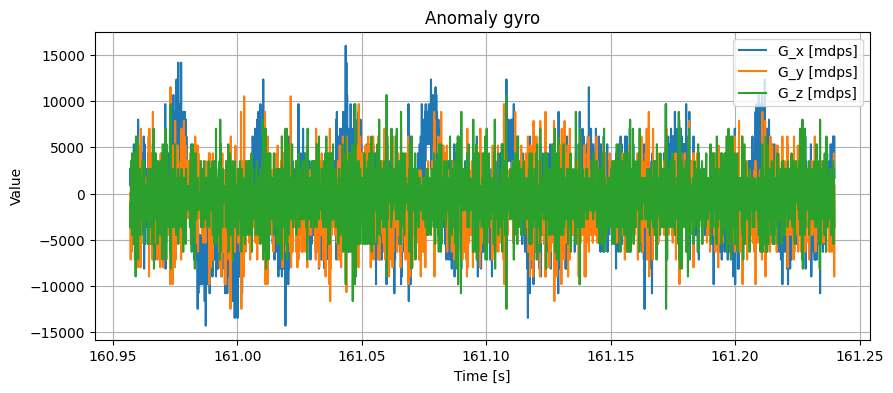

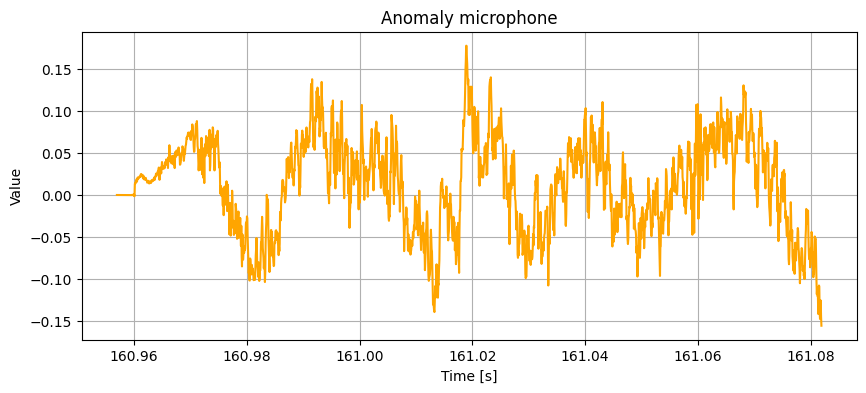

In [34]:
acc_file = os.path.join(TEST_DIR, "ism330dhcx_acc_20240418_13_10_56_dataLog_15.parquet")
gyro_file = os.path.join(TEST_DIR, "ism330dhcx_gyro_20240418_13_10_56_dataLog_15.parquet")
mic_file = os.path.join(TEST_DIR, "imp23absu_mic_20240418_13_10_56_dataLog_15.parquet")

plot_acc_gyro(acc_file, "Anomaly acc")
plot_acc_gyro(gyro_file, "Anomaly gyro")
plot_microphone(mic_file, "Anomaly microphone")